In [1]:
import pandas as pd
from sklearn import tree 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
titanic =pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
Input = titanic[["Pclass","Sex","Age","Fare"]]
Input

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [4]:
target =titanic.Survived
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [5]:
Input.sample()

,Pclass,Sex,Age,Fare
451,3,male,NaN,19.9667


In [6]:
Input = titanic[["Pclass", "Sex", "Age", "Fare"]].copy()
Input["Sex"] = pd.get_dummies(Input["Sex"], drop_first=True).astype(int)

In [7]:
Input

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [61]:
x_train , x_test, y_train , y_test =train_test_split(Input , target ,test_size=0.2)

In [63]:
x_train

,Pclass,Sex,Age,Fare
794,3,1,25.0,7.8958
614,3,1,35.0,8.0500
840,3,1,20.0,7.9250
757,2,1,18.0,11.5000
660,1,1,50.0,133.6500
...,...,...,...,...
105,3,1,28.0,7.8958
70,2,1,32.0,10.5000
149,2,1,42.0,13.0000
523,1,0,44.0,57.9792


In [65]:
x_test

,Pclass,Sex,Age,Fare
17,2,1,NaN,13.000
841,2,1,16.0,10.500
635,2,0,28.0,13.000
851,3,1,74.0,7.775
402,3,0,21.0,9.825
...,...,...,...,...
655,2,1,24.0,73.500
331,1,1,45.5,28.500
273,1,1,37.0,29.700
510,3,1,29.0,7.750


In [67]:
Model_tree = tree.DecisionTreeClassifier()
Model_tree.fit(x_train , y_train)

DecisionTreeClassifier()

In [69]:
Model_tree.score(x_train , y_train)

0.976123595505618

In [71]:
Model_tree.score(x_test,y_test)

0.8491620111731844

In [73]:
Input.sample()

,Pclass,Sex,Age,Fare
156,3,0,16.0,7.7333


In [75]:
Model_tree.predict([[2,1,10.0,10]])[0]

1

In [77]:
y_pred = Model_tree.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [79]:
y_test

17     1
841    0
635    1
851    0
402    0
      ..
655    0
331    0
273    0
510    1
799    0
Name: Survived, Length: 179, dtype: int64

In [81]:
acc = confusion_matrix(y_pred ,y_test)

In [83]:
acc

array([[92, 12],
       [15, 60]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

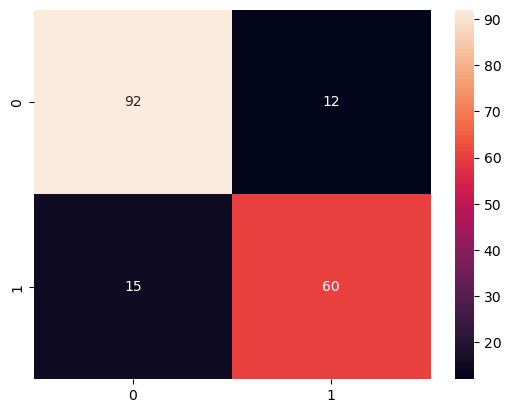

In [85]:
sns.heatmap(acc,annot=True)
plt.show